# $\underline{\text{Practice Session : TP4 Quadrature}}$
##### Arnaud Capitan

#### $\underline{\text{Part 2 : Implementation}}$

I stopped with question 13, didn't implement question 14.
___

8] For $\mathcal{X} = [a, b]$, what change of variable should be applied to the nodes $x_i$ ?

If we assume that the nodes $x_i$ are the roots of the Legendre polynomials on [-1, 1], for $\mathcal{X} = [a, b]$, we need to apply an affine transformation $\phi(x) = \alpha x + \beta$ such that :

$$
\begin{cases}
  \phi(-1) = a \\
  \phi(1) = b
\end{cases}
\iff
\begin{cases}
  -\alpha + \beta = a \\
  \alpha + \beta = b
\end{cases}
\iff
\begin{cases}
  \alpha = \frac{b-a}{2} \\
  \beta = \frac{a+b}{2}
\end{cases}
$$

We need to apply $\phi(x) = \frac{b-a}{2} x + \frac{a+b}{2}$ to the nodes $x_i$ for $\mathcal{X} = [a, b]$

In the integral, by applying this change of variable $x = \phi(u)$, we get :

Since $ dx = \frac{b-a}{2}du $,

$$\int_{a}^{b} f(x) \,dx = \frac{b-a}{2}\int_{-1}^{1} f(u) \,du$$
___

9] Implement a function def gauss_legendre_simple(f, a, b, nodes, weights) that approximates the integral of a function $f$ over $[a, b]$ using the Gaussian-Quadrature rule. Test your implementation on some analytically integrable function of your choice.

We recall the definition of a simple quadrature method on $\mathcal{X} = [a, b]$, an operator $\hat{I}(f)$ that verifies :

$$ f \rightarrow \hat{I}(f) = (b-a)\sum_{i=0}^{n} \lambda _if(x_i) $$

Such that $x_i \in [a, b]$, $\lambda _i > 0$, $\sum_{i=0}^{n} \lambda _i = 1$

For the Legendre polynomials, since we have $\sum_{i=0}^{n} \lambda _i = 2$, we need to normalize :

$$\lambda _i \rightarrow \frac{\lambda _i}{\sum_{j=0}^{n} \lambda _j}$$

In [36]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import time

In [20]:
def phi(nodes,a,b):
    return((b-a)*nodes/2 + (a+b)/2)

def gauss_legendre_simple(f, a, b, nodes, weights):
    '''
    f : function defined on [a,b]
    a,b : define the interval [a,b]
    nodes : points where we take the values of f to estimate the integral
    weights : weights of the nodes
    Computes an approximate value of the integral of f over [a,b]
    '''
    result = (b-a)*np.sum(weights*f(phi(nodes,a,b)))
    return(result)
    

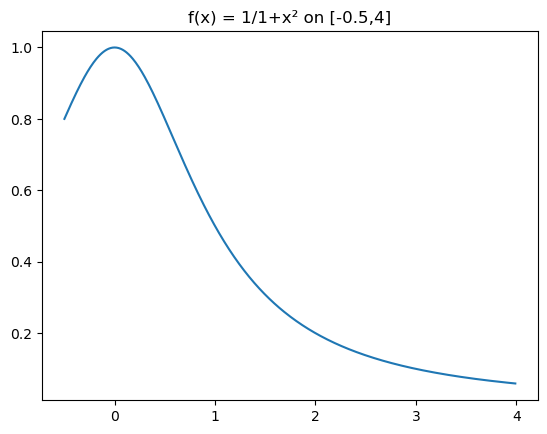

Gauss Legendre integral approximation value for f1 : 2.088272383354351
Exact integral value for f1 : 1.7894652726688387


In [22]:
# Example :

def f1(x): 
    return(1/(1+x**2)) #Analytically integrable function

def integral_f1(a,b):
    return(np.arctan(b)-np.arctan(a))

a = -0.5
b = 4
X = np.arange(a,b,0.01)
Y = f1(X)
plt.plot(X,Y)
plt.title(f"f(x) = 1/1+x² on [{a},{b}]")
plt.show()

nodes, weights = scipy.special.roots_legendre(n=2)
weights = weights/np.sum(weights) #Normalized weights

print(f"Gauss Legendre integral approximation value for f1 : {gauss_legendre_simple(f1,a,b,nodes,weights)}")
print(f"Exact integral value for f1 : {integral_f1(a,b)}")

___
10] Implement a function def gauss_legendre(f, n, M, a, b) that performs the composite rule of Gauss-Legendre over M sub-intervals of [a, b].

We recall the definition of a composite quadrature method on $\mathcal{X} = [a, b]$ : 

With $\alpha _0 = a < a_1 < ... < \alpha _M = b$ a subdivision of [a, b], the CQM is an operator $\hat{I}(f)$ that verifies :

$$ f \rightarrow \hat{I}(f) = \sum_{m=0}^{M-1}(\alpha _{m+1} - \alpha _m)\sum_{i=0}^{n_m} \lambda _{m,i}f(x_{m,i}) $$

Such that $x_{m,i} \in [\alpha _m, \alpha _{m+1}]$, $\lambda _{m,i} > 0$, $\sum_{i=0}^{n} \lambda _{m,i} = 1$

We also assume that the M sub-intervals are all the same size and uniformly spaced in $[a, b]$

In [23]:
def gauss_legendre(f, n, M, a, b):
    '''
    f : function defined on [a,b]
    n : quadrature order
    M : number of sub-intervals
    a,b : define the interval [a,b]
    Performs the composite rule of Gauss-Legendre over M sub-intervals of [a, b]
    '''
    roots, weights = scipy.special.roots_legendre(n)
    weights = weights/np.sum(weights)
    M_points = np.linspace(a,b,M+1) #Points of [a,b] that define all the sub-intervals
    result = 0
    for i in range(M): #We apply legendre_simple on every sub_intervals
        result += gauss_legendre_simple(f,M_points[i],M_points[i+1],roots,weights)
    return(result)

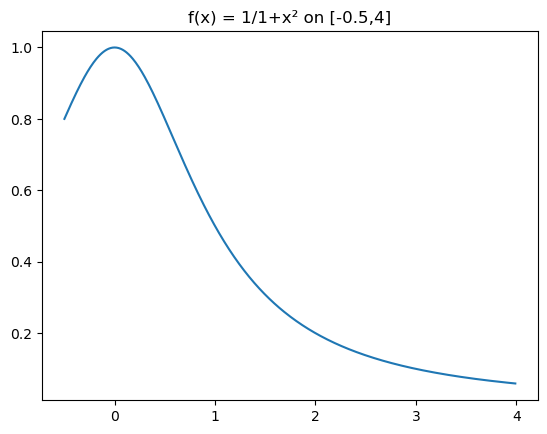

Gauss Legendre integral approximation value for f1, n = 4, M = 8 : 1.7894653576688395
Exact integral value for f1 : 1.7894652726688387
Error : 8.50000008156826e-08


In [25]:
# Example with composite rule for quadrature :

a = -0.5
b = 4
X = np.arange(a,b,0.01)
Y = f1(X)
plt.plot(X,Y)
plt.title(f"f(x) = 1/1+x² on [{a},{b}]")
plt.show()

n = 4
M = 8

print(f"Gauss Legendre integral approximation value for f1, n = {n}, M = {M} : {gauss_legendre(f1,n,M,a,b)}")
print(f"Exact integral value for f1 : {integral_f1(a,b)}")

print(f"Error : {abs(gauss_legendre(f1,n,M,a,b)-integral_f1(a,b))}")

Using only 8 subintervals, and a quadrature of order 4, we get an error that is really small.

___

11] Write an identical function but with a vectorized implementation gauss_legendre_vectorized(f, n, M, a, b) with numpy (does not contain any loop or list comprehensions. Hint : it should not
call gauss_legendre_simple).

Since we must not loop, we will use numpy to create every point beforehand and sum everything in one iteration. We want it to be optimized.

gauss_legendre_simple : $(b-a)*np.sum(weights*f(phi(nodes,a,b)))$
Applied with M sub-intervals : 

$$(\alpha _{m+1} - \alpha _m)*np.sum(weights*f(phi(nodes,\alpha _m,\alpha _{m+1})))$$

So we apply np.sum to this expression over every sub-interval :

$$np.sum((\alpha _{m+1} - \alpha _m)*np.sum(weights*f(phi(nodes,\alpha _m,\alpha _{m+1}))))$$

This expression needs to be computed without a loop on every interval :
$phi(nodes,\alpha _m,\alpha _{m+1})$

We have :

$\phi(x) = \frac{\alpha _{m+1}-\alpha _m}{2} x + \frac{\alpha _m + \alpha _{m+1}}{2}$

In [34]:
def gauss_legendre_vectorized(f, n, M, a, b):
    '''
    f : function defined on [a,b]
    n : quadrature order
    M : number of sub-intervals
    a,b : define the interval [a,b]
    Performs the vectorized composite rule of Gauss-Legendre over M sub-intervals of [a, b]
    '''
    roots, weights = scipy.special.roots_legendre(n)
    weights = weights/np.sum(weights)
    M_points = np.linspace(a,b,M+1) #Points of [a,b] that define all the sub-intervals
    alpha_diff = M_points[1:] - M_points[:-1] #alpha_m+1 - alpha_m
    alpha_sum = M_points[1:] + M_points[:-1] #alpha_m+1 + alpha_m
    new_roots = alpha_diff[:, None]*roots/2 + alpha_sum[:, None]/2 #We need to apply phi to every root for every sub-interval without looping
    result = np.sum(alpha_diff*np.sum(weights*f(new_roots),axis=1))
    return(result)

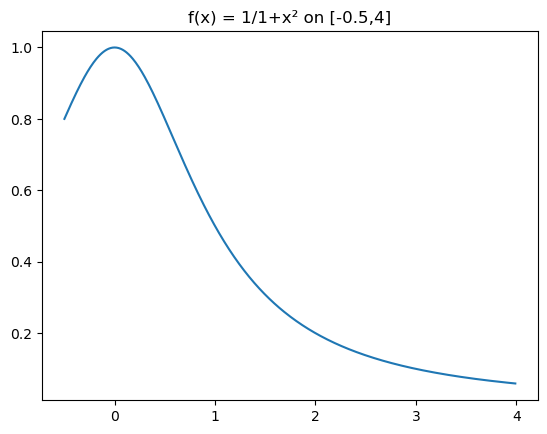

Gauss Legendre integral approximation value for f1, n = 10000, M = 5000 : 1.7894652726688287
Computation time : 4.27

Gauss Legendre vectorized integral approximation value for f1, n = 10000, M = 5000 : 1.7894652726688387
Computation time : 5.61


In [41]:
# Example with composite rule for quadrature :

a = -0.5
b = 4
X = np.arange(a,b,0.01)
Y = f1(X)
plt.plot(X,Y)
plt.title(f"f(x) = 1/1+x² on [{a},{b}]")
plt.show()

n = 10000
M = 5000

start_time = time.time()
print(f"Gauss Legendre integral approximation value for f1, n = {n}, M = {M} : {gauss_legendre(f1,n,M,a,b)}")
print(f"Computation time : {(time.time()-start_time):.2f}\n")
start_time = time.time()
print(f"Gauss Legendre vectorized integral approximation value for f1, n = {n}, M = {M} : {gauss_legendre_vectorized(f1,n,M,a,b)}")
print(f"Computation time : {(time.time()-start_time):.2f}")

We don't seem to gain that much time by vectorizing the computation.
___

12] Visualize in one plot the integration error of the integral of 1/x from 2 to 5 as a function of both n and M

$\frac{1}{x}$ is analytically integrable on $\mathbb{R}^+_*$, with primitive $\ln (x)$ on $\mathbb{R}^+_*$


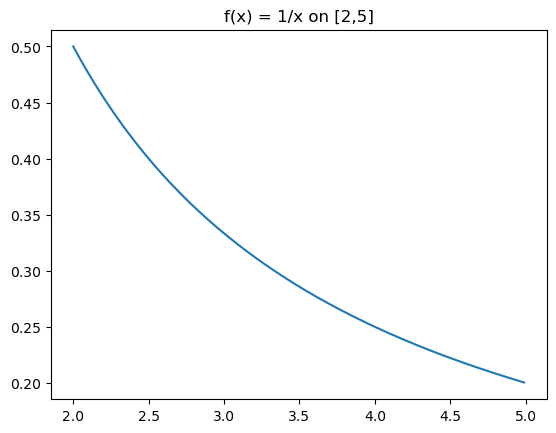

C:\Users\Arnaud\AppData\Local\Temp\ipykernel_27100\944358254.py:29: RuntimeWarning: divide by zero encountered in log
  error = np.log(abs(result - integral_f2(a, b)))


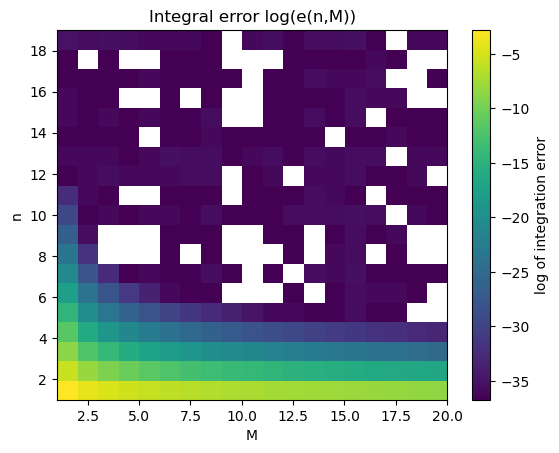

In [65]:
# Example with composite rule for quadrature :

def f2(x):
    return(1/x)

def integral_f2(a,b):
    assert a>0 and b>a
    return(np.log(b)-np.log(a))

a = 2
b = 5
X = np.arange(a,b,0.01)
Y = f2(X)
plt.plot(X,Y)
plt.title(f"f(x) = 1/x on [{a},{b}]")
plt.show()

N = 20
M = 20
n_values = range(1, N)
M_values = range(1, M)

integral_error = []

for n in n_values:
    row = []
    for M in M_values:
        result = gauss_legendre(f2, n, M, a, b)
        error = np.log(abs(result - integral_f2(a, b)))
        row.append(error)
    integral_error.append(row)

plt.imshow(integral_error, extent=[1, N, 1, M], origin = 'lower')
plt.colorbar(label="log of integration error")
plt.xlabel('M')
plt.ylabel('n')
plt.title('Integral error log(e(n,M))')
plt.show()

By printing the values, we can see that the error falls below $10^{-6}$ really quickly, and its maximum is 0.05

We can't get much information using the absolute error because it decreases to 0 very quickly, so we use the log error to see how fast it decreases.

White squares mean that the integral log error is -infinity
___

13] Write a function def trapezoidal that computes the composite trapezoidal rule of Ex 1. Compare the integration error with the Gauss-Legendre method with the same values of M and the number of nodes. What do you conclude ?


The trapezoidal method with M sub-intervals is described as follows :

$\sum_{j=0}^{M-1} \widehat{I}_{[a_j, a_{j+1}]}(f) = \frac{b-a}{2M} \left( f(a) + 2 \sum_{j=1}^{M-1} f(a_j) + f(b) \right)$



In [59]:
def trapezoidal(f, a, b, M):
    '''
    f : function defined on [a,b]
    M : number of sub-intervals
    a,b : define the interval [a,b]
    Performs an approximation of the integral of f
    '''
    M_points = np.linspace(a,b,M+1)
    return ((b-a)*(f(a) + f(b) + np.sum(2*f(M_points[1:-1])))/(2*M))

M = 10
trapezoidal_value = trapezoidal(f2, a, b, M)
gauss_legendre_value = gauss_legendre(f2, 2, M, a, b)
exact_value = integral_f2(a, b)

print(f"Trapezoidal error: {abs(trapezoidal_value - exact_value)}")
print(f"Gauss-Legendre error: {abs(gauss_legendre_value - exact_value)}")

Trapezoidal error: 0.0015709332397411124
Gauss-Legendre error: 6.753636144773978e-07


The integration error with the Gauss-Legendre method with the same values of M and the number of nodes is much smaller using the Gauss-Legendre method than the trapezoidal method.
___